In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df=pd.read_csv('2110.csv')
df.head()

,Date,Open,High,Low,Close
0,10/18/2004,482.58,482.58,473.51,478.04
1,10/19/2004,476.23,480.76,474.41,475.32
2,10/20/2004,477.14,478.95,468.06,468.06
3,10/21/2004,468.06,471.69,462.62,468.06
4,10/24/2004,472.60,476.23,457.18,467.16


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2004-10-18,482.58,482.58,473.51,478.04
2004-10-19,476.23,480.76,474.41,475.32
2004-10-20,477.14,478.95,468.06,468.06
2004-10-21,468.06,471.69,462.62,468.06
2004-10-24,472.60,476.23,457.18,467.16


In [14]:
df.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [78]:
df['day']=(df.index).day_name()
df['dayInMonth']=df.index.day
df['monthInYear']=df.index.month

df['month']=df.index.month_name()
df['year']=df.index.year
df['is weekend zz']=df['day']=='Friday'

df.head()
print(df.isna().sum())
df.dropna(axis=0, inplace=True)

print(df.isna().sum())






Open                      0
High                      0
Low                       0
Close                     0
rolling_mean_close_30    99
day                       0
month                     0
year                      0
weekend                   0
is weekend zz             0
dayInMonth                0
monthInYear               0
dtype: int64
Open                     0
High                     0
Low                      0
Close                    0
rolling_mean_close_30    0
day                      0
month                    0
year                     0
weekend                  0
is weekend zz            0
dayInMonth               0
monthInYear              0
dtype: int64


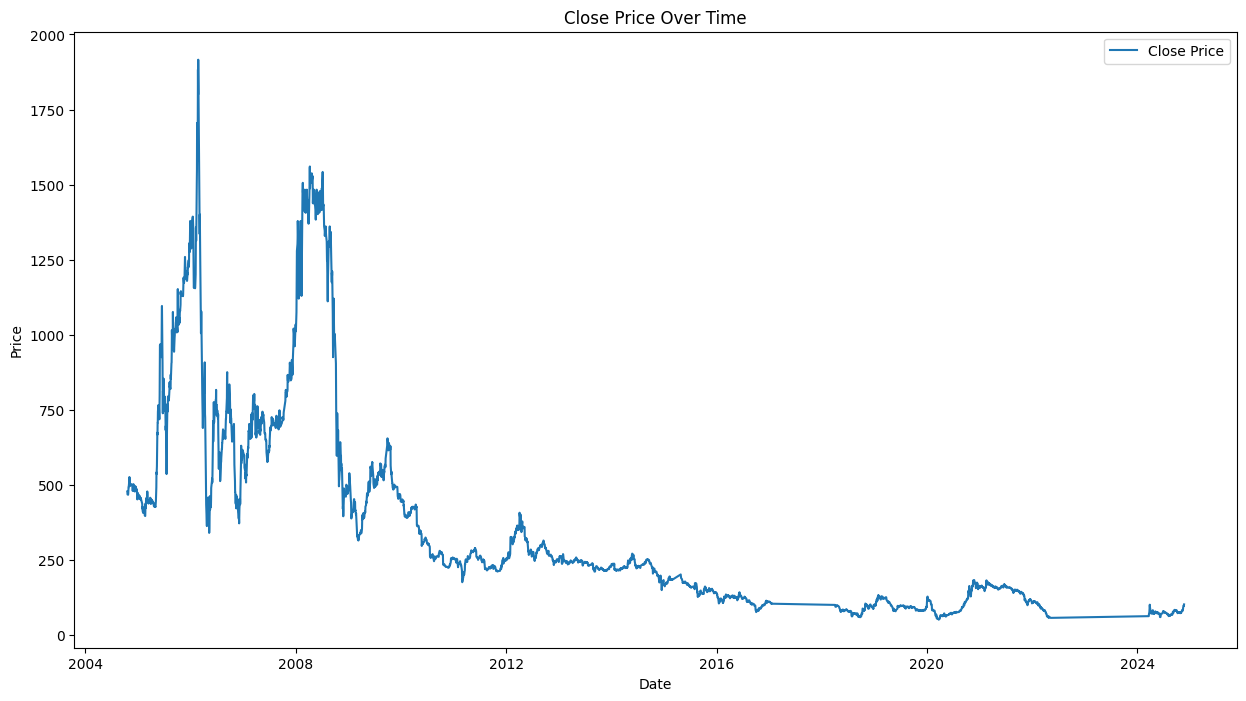

In [17]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.lineplot(x=df.index, y=df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_1804\3714758613.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(df['Close'].resample('Y').mean())


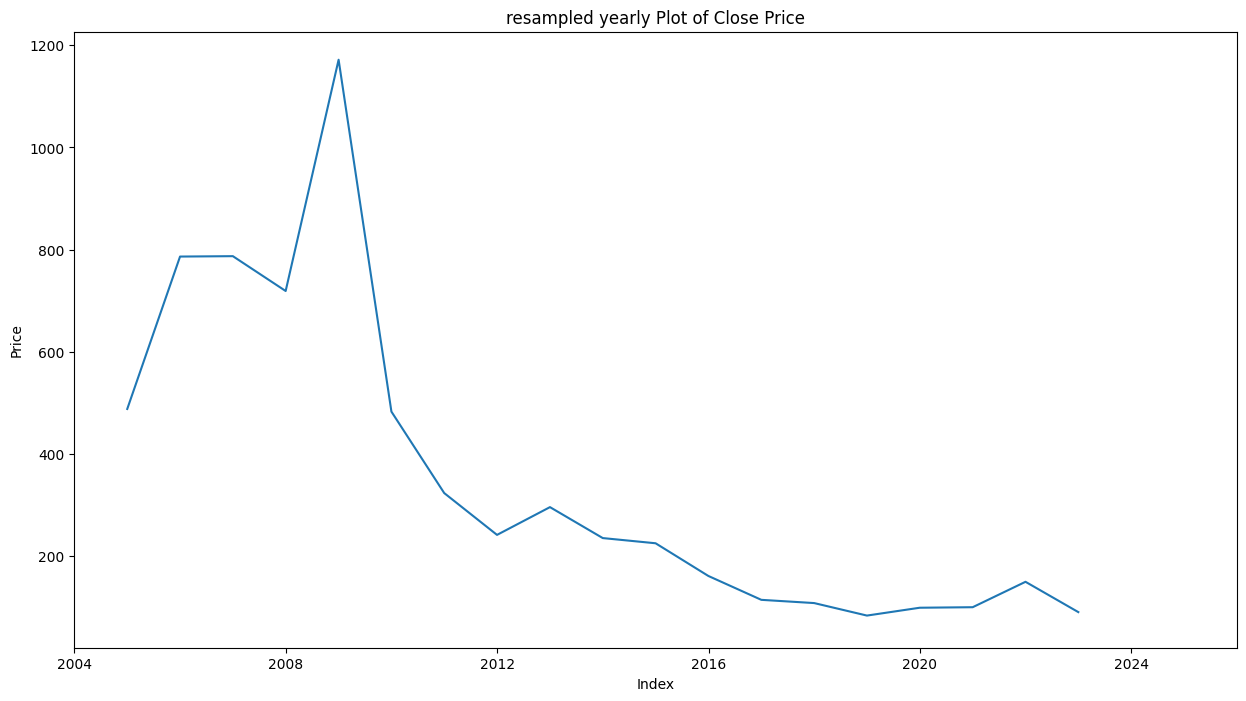

In [45]:
import seaborn as sns
plt.figure(figsize=(15, 8))
plt.plot(df['Close'].resample('Y').mean())
plt.title('resampled yearly Plot of Close Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()



C:\Users\pc\AppData\Local\Temp\ipykernel_1804\2401160379.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Close'][df.index<'1/1/2010'].resample('M').mean(),


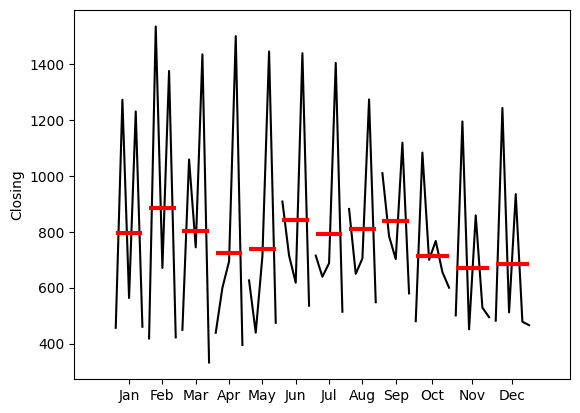

In [54]:
month_plot(df['Close'][df.index<'1/1/2010'].resample('M').mean(),
           ylabel = 'Closing')
plt.show()



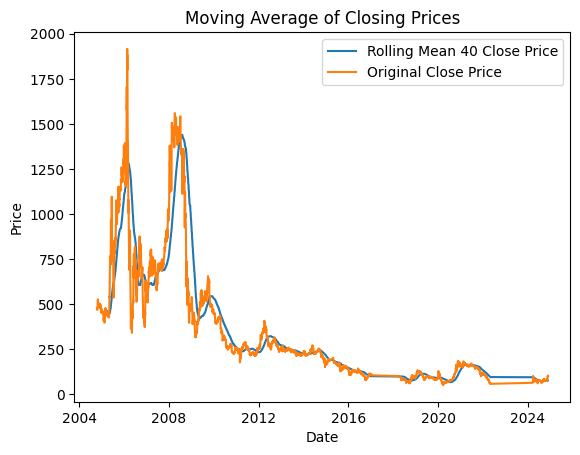

In [31]:
df['rolling_mean_close_30'] = df['Close'].rolling(window=100).mean()

plt.plot(df['rolling_mean_close_30'],label='Rolling Mean 40 Close Price')
plt.plot(df['Close'], label='Original Close Price')
plt.title('Moving Average of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()






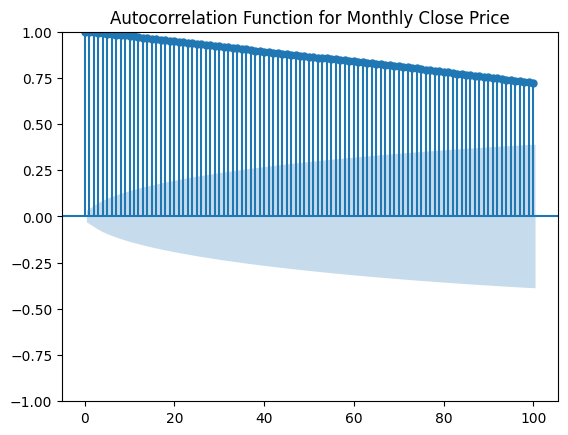

In [37]:
plot_acf(df['Close'], lags=100)
plt.title('Autocorrelation Function for Monthly Close Price')
plt.show()



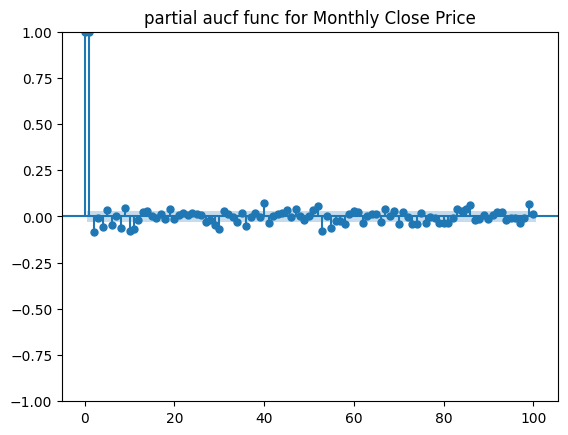

In [40]:
plot_pacf(df['Close'], lags=100)
plt.title('partial aucf func for Monthly Close Price')
plt.show()

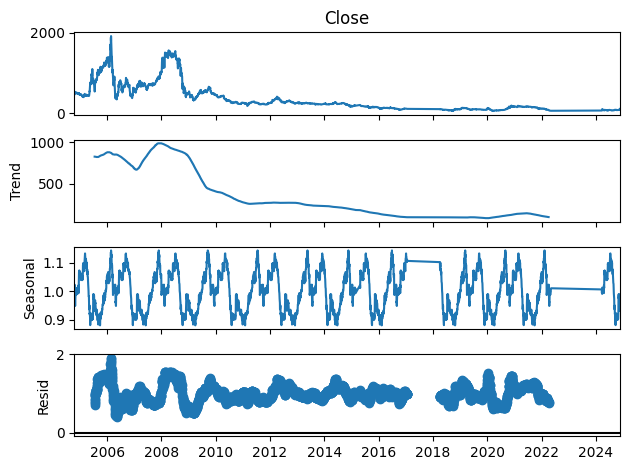

In [ ]:
# decompostoin mulitplicative
decomposition = seasonal_decompose(df['Close'],model = 'mul',period = 365)
fig = decomposition.plot()
plt.show()

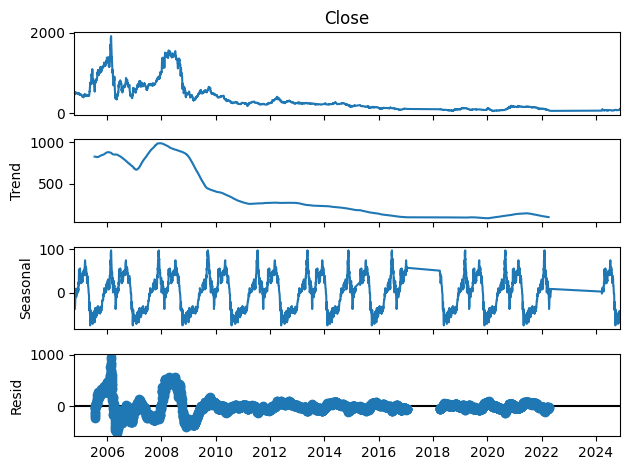

In [53]:
# decompostoin additive
decomposition = seasonal_decompose(df['Close'],model = 'additive',period = 365)
fig = decomposition.plot()
plt.show()